<h1>Exploratory Data Analysis on Bank of Botswana data for Inflation Rates, Exchange Rates, and Prices</h1>

<H2>TABLE OF CONTENTS</H2>

* [Introduction](#Introduction)
* [Exploratory Data Analysis](#exploratory-data-analysis)
  * [Data Visualizations](#Data-Visualization)
    * [Line Plot](#Line-Plot)
    * [Histogram & Density Plot](#Histogram-&-Density-Plot)
    * [Box & Whisker Plot](#Box-&-Whisker-Plot)
    * [Lag Scatter Plot](#Lag-Scatter-Plot)
    * [Autocorrelation Plot](#Autocorrelation-Plot)
  * [Stationarity Assessment](#Stationarity-Assessment)
    * [Consistency of Summary Statistics](#Consistency-of-Summary-Statistics)
    * [Augmented Dickey Fuller Test](#Augmented-Dickey-Fuller-Test)
  * [Random Walk - Testing](#Random-Walk-Testing)

<a class='anchor' name='Introduction'> <h3 id='Introduction'>Introduction</h3> </a>

This notebook takes an in depth uni-variate analysis of inflation rate data from 2008 to 2022. The time series data was collected from the Bank of Botswana website and also cleaned in the first notebook - Data Collection and Wrangling.

According to Botha B et al, traditional forecasting models tend to predict inflation rates better in the short term while learning models perform better in the long term. In addition, it is mentioned that they perform best when a conditional forecasting function is used.

In this project, as a baseline, a random walk will be used to predict CPI, which is our measure for inflation. Both a uni-variate and multivariate analysis will be conducted. Eventually, multiple models will be used to predict inflation and their performances will be measured and compared.

This is the second notebook for the project for predicting inflation rate using data collected from Bank of Botswana. The first notebook was about collecting the data and cleaning it by dealing with various issues such as missing values.

This notebook will take a look at various patterns in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

Bringing the cleaned data into the notebook

In [2]:
# Bringing the csv data file (Economic_Data_BOB) into the notebook
df = pd.read_csv('../Data/Economic_Data_BOB')
df.head()

,date,7 Day Bobc,1 Month BoBC,CHN,EUR,GBP,USD,SDR,YEN,ZAR,CPI,CPIT,CPIXA
0,2022-09-02,2.65,2.43,0.5340,0.0775,0.0670,0.0772,0.0595,10.84,1.3355,12.7,10.3,6.6
1,2022-09-01,2.65,2.43,0.5359,0.0774,0.0670,0.0775,0.0596,10.80,1.3333,12.7,10.3,6.6
2,2022-08-31,2.65,2.43,0.5395,0.0779,0.0669,0.0782,0.0599,10.82,1.3234,12.7,10.3,6.6
3,2022-08-30,2.15,2.43,0.5420,0.0783,0.0669,0.0783,0.0601,10.85,1.3191,12.7,10.3,6.6
4,2022-08-29,2.15,2.43,0.5405,0.0785,0.0669,0.0780,0.0600,10.83,1.3216,12.7,10.3,6.6


In [3]:
#Changing type of column date to datetime object. Then setting it as index.
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [4]:
# Only using data from 2008 upto 2022 September for this project.
df = df.loc['2008-01-01':'2022-09-02']
df.head(20)

,7 Day Bobc,1 Month BoBC,CHN,EUR,GBP,USD,SDR,YEN,ZAR,CPI,CPIT,CPIXA
date,,,,,,,,,,,,
2022-09-02,2.65,2.43,0.5340,0.0775,0.0670,0.0772,0.0595,10.84,1.3355,12.7,10.3,6.6
2022-09-01,2.65,2.43,0.5359,0.0774,0.0670,0.0775,0.0596,10.80,1.3333,12.7,10.3,6.6
2022-08-31,2.65,2.43,0.5395,0.0779,0.0669,0.0782,0.0599,10.82,1.3234,12.7,10.3,6.6
2022-08-30,2.15,2.43,0.5420,0.0783,0.0669,0.0783,0.0601,10.85,1.3191,12.7,10.3,6.6
2022-08-29,2.15,2.43,0.5405,0.0785,0.0669,0.0780,0.0600,10.83,1.3216,12.7,10.3,6.6
2022-08-26,2.15,2.43,0.5393,0.0788,0.0665,0.0785,0.0602,10.75,1.3176,12.7,10.3,6.6
2022-08-25,2.15,2.43,0.5379,0.0783,0.0662,0.0785,0.0600,10.72,1.3225,12.7,10.3,6.6
2022-08-24,2.15,2.43,0.5359,0.0784,0.0660,0.0779,0.0598,10.66,1.3294,12.7,10.3,6.6
2022-08-23,2.15,2.44,0.5360,0.0786,0.0664,0.0779,0.0599,10.70,1.3278,12.7,10.3,6.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3771 entries, 2022-09-02 to 2008-01-01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   7 Day Bobc    3771 non-null   float64
 1   1 Month BoBC  3771 non-null   float64
 2   CHN           3771 non-null   float64
 3   EUR           3771 non-null   float64
 4   GBP           3771 non-null   float64
 5   USD           3771 non-null   float64
 6   SDR           3771 non-null   float64
 7   YEN           3771 non-null   float64
 8   ZAR           3771 non-null   float64
 9   CPI           3771 non-null   float64
 10  CPIT          3771 non-null   float64
 11  CPIXA         3771 non-null   float64
dtypes: float64(12)
memory usage: 383.0 KB


In [6]:
df.describe()

,7 Day Bobc,1 Month BoBC,CHN,EUR,GBP,USD,SDR,YEN,ZAR,CPI,CPIT,CPIXA
count,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000
mean,4.194962,0.021199,0.240576,0.090499,0.076469,0.113843,0.077152,11.440367,1.234126,5.906046,5.569451,5.716309
std,3.791778,0.225670,0.302073,0.011229,0.010232,0.024041,0.017314,1.658064,0.114577,3.431899,3.065374,3.178861
min,0.730000,0.000000,0.000000,0.071800,0.058800,0.077200,0.059500,8.690000,1.025800,0.900000,1.000000,1.600000
25%,1.290000,0.000000,0.000000,0.082200,0.067600,0.092900,0.067000,10.210000,1.141650,3.100000,2.900000,3.300000
50%,3.010000,0.000000,0.000000,0.086700,0.074200,0.104800,0.072800,11.100000,1.236300,4.600000,4.200000,5.300000
75%,6.570000,0.000000,0.599650,0.100726,0.084800,0.138200,0.089450,12.340000,1.324050,8.200000,7.900000,7.000000
max,13.130000,2.440000,0.678700,0.117500,0.100400,0.167700,0.821000,18.210000,1.549000,15.100000,13.600000,16.400000


<h3>Exploratory Data Analysis</h3>

As a baseline, the data will be analysed as a time series. Beyond that, other techniques will be used.

We will later be looking to work on the time series data and engineer it into machine learning data. ie. The idea is to convert the data from time and value, to inputs and outputs. For the sake of initial simplicity, the data will be prepared for a uni-variate analysis. A multivariate analysis shall also be performed in this project after the initial analysis.

In [7]:
#One more look at the dataframe we have so far:

df.head()

,7 Day Bobc,1 Month BoBC,CHN,EUR,GBP,USD,SDR,YEN,ZAR,CPI,CPIT,CPIXA
date,,,,,,,,,,,,
2022-09-02,2.65,2.43,0.5340,0.0775,0.0670,0.0772,0.0595,10.84,1.3355,12.7,10.3,6.6
2022-09-01,2.65,2.43,0.5359,0.0774,0.0670,0.0775,0.0596,10.80,1.3333,12.7,10.3,6.6
2022-08-31,2.65,2.43,0.5395,0.0779,0.0669,0.0782,0.0599,10.82,1.3234,12.7,10.3,6.6
2022-08-30,2.15,2.43,0.5420,0.0783,0.0669,0.0783,0.0601,10.85,1.3191,12.7,10.3,6.6
2022-08-29,2.15,2.43,0.5405,0.0785,0.0669,0.0780,0.0600,10.83,1.3216,12.7,10.3,6.6


In [8]:
#Making a new dataframe for the uni-variate analysis (unidf)
unidf = df[['CPI']]
unidf.head(5)

,CPI
date,
2022-09-02,12.7
2022-09-01,12.7
2022-08-31,12.7
2022-08-30,12.7
2022-08-29,12.7


<h4 id='Data-Visualization'>Data Visualization</h4>

The target variable here is inflation rate. At this point we are making a uni-variate analysis, so the following plots will only be looking at inflation rate in relation to time.

<h5>Line Plot</h5>

Firstly, lets take a look at a line plot of the uni-variate data.

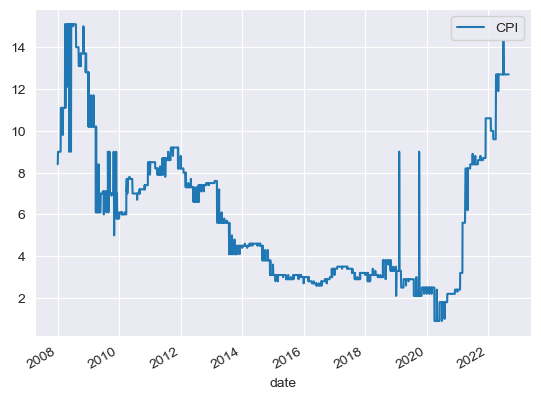

In [9]:
unidf.plot()
plt.show()

<h5>Histogram & Density Plot</h5>

Below is a histogram to visualize the spread of the data.

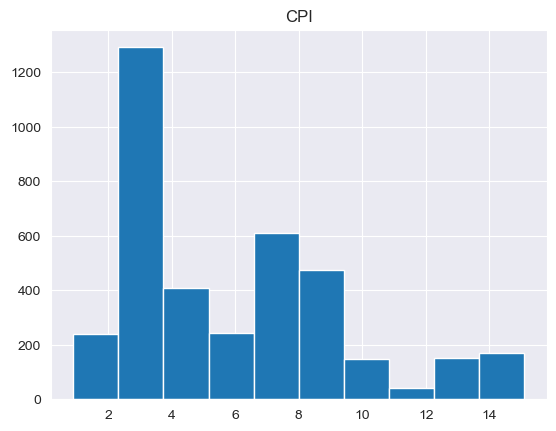

In [10]:
unidf.hist()
plt.show()

The highest frequency for the CPI is at about 3, which is to be expected since this is in the target CPI range for the Central Bank of Botswana. But the data does range all the way from 1 to about 15.

The Density plot below shows the shape of the distribution.

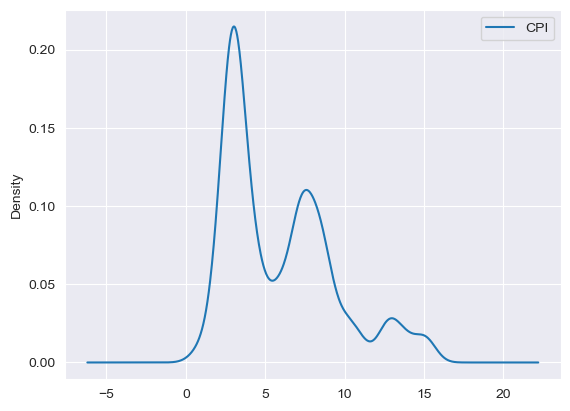

In [11]:
unidf.plot(kind='kde')
plt.show()

It certainly doesn't look like a Gaussian Distribution. It is highly skewed to the right of the highest occurring value of about 3. This may have to be addressed in the preprocessing notebook

Let's take a look at the summary statistics of the data.

In [12]:
unidf.describe()

,CPI
count,3771.000000
mean,5.906046
std,3.431899
min,0.900000
25%,3.100000
50%,4.600000
75%,8.200000
max,15.100000


As can be seen above, the mean CPI over the years is actually 5.9, which is about double the objective range.

Now we shall analyse a box and whisker plot which will show distribution of CPI for each year.

<h5>Box & Whisker Plot</h5>

<AxesSubplot:xlabel='date', ylabel='CPI'>

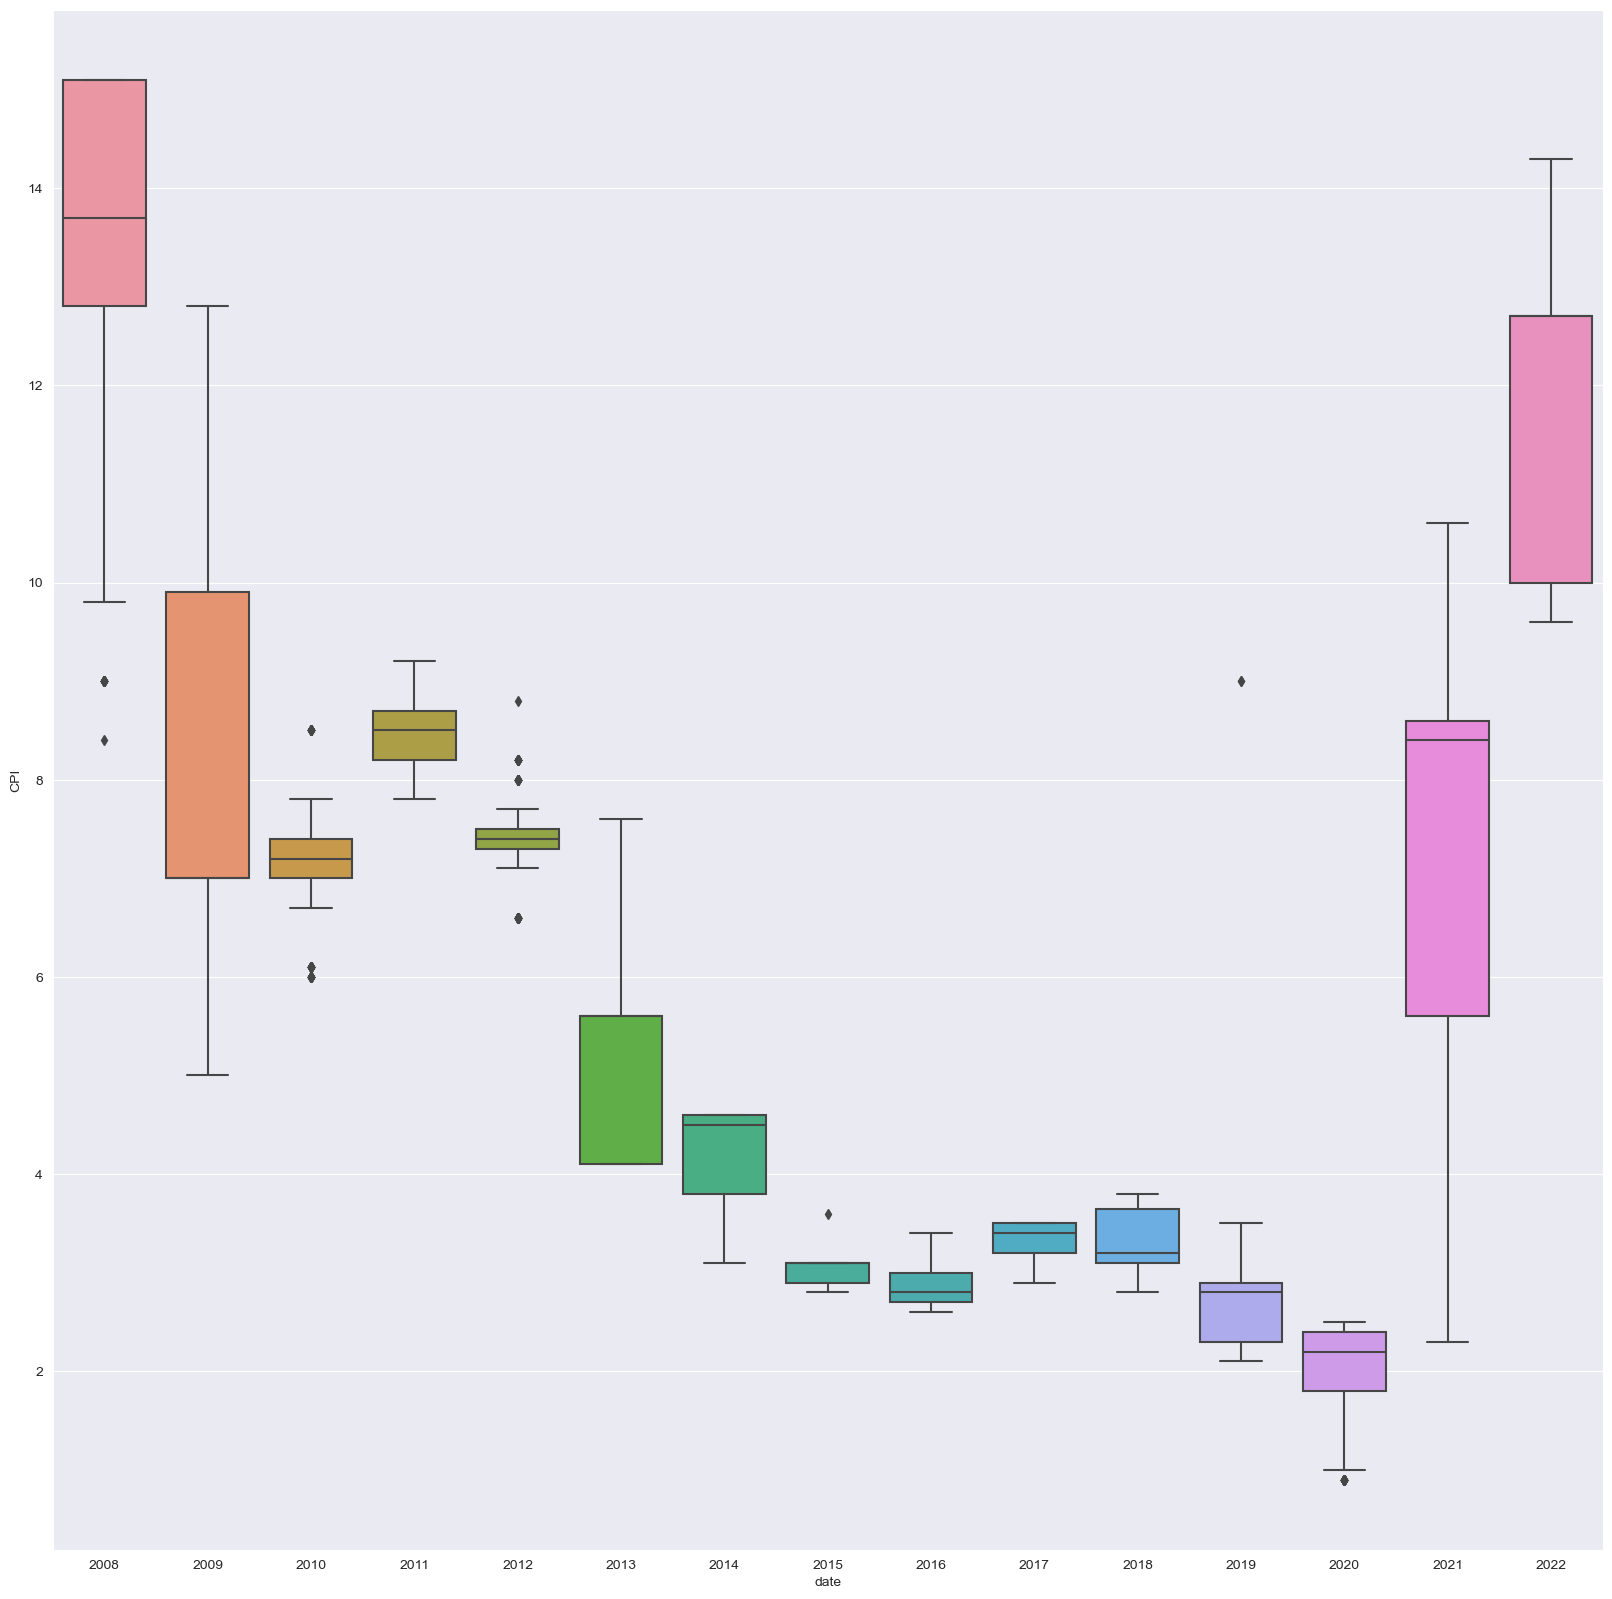

In [13]:
plt.figure(figsize=(20,20))
sns.boxplot(y=unidf['CPI'], x=unidf.index.year)

So while the overall mean of the data is double that of the objective range set by the central bank, it is easy to see in the plot above that between 2015 and 2020, the average CPI was either within the range or very close to the range.

Beyond 2020, it is likely that CPI was highly influenced by the Covid 19 pandemic introducing a lot of volatility and instability to the data.

A highly volatile dataset tends to be very noisy and can be difficult to use for predictions. Classical statistical models tend to perform less well with these datasets. Perhaps more sophisticated/advanced learning models can perform better.

For now as mentioned before, a simple uni-variate time series analysis will be performed as a baseline model for evaluation.

<h5>Lag Scatter Plot</h5>

Since this is a time series dataset, there is a general assumption that there is a relationship between each observation and it's previous observation or lag. Pandas lag plot can portray the relationship between observations and the previous observations.

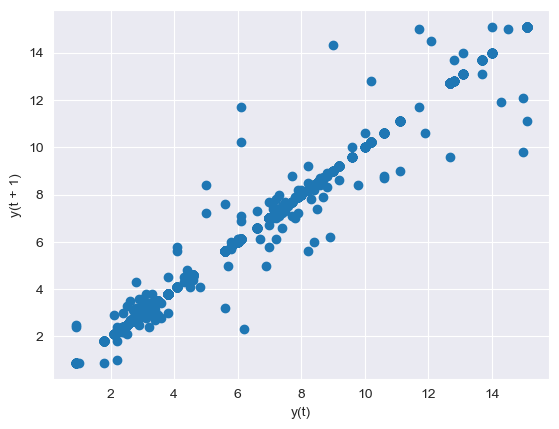

In [14]:
pd.plotting.lag_plot(unidf)
plt.show()

The values are clearly highly, positively correlated to their lag values as can be seen in the lag plot above.

<h5>Autocorrelation Plot</h5>

Autocorrelation plot below will help assess the strength and type of relationship between various CPI entries and their lag values. The plot can help understand how the relationship changes over the lag.

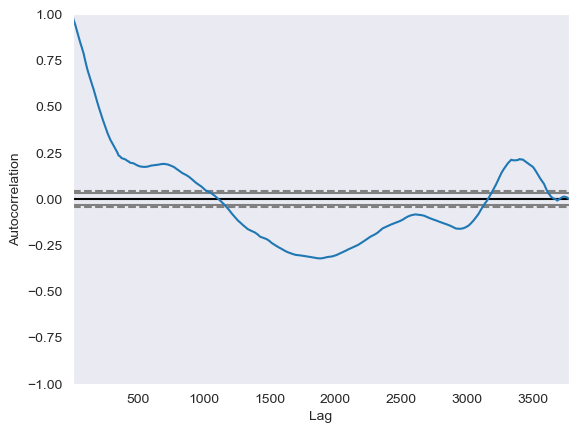

In [15]:
pd.plotting.autocorrelation_plot(unidf)
plt.show()

As expected, the correlation between values and their lag (auto-correlation) decreases as the lag increases. While the lag is low, the auto-correlation is very high.

It is also important to note that high levels of auto-correlation up-to around 3500 entries show that the data is likely non-stationary. More tests will be done including the Augmented Dickey-Fuller Test which will be more conclusive. Stationarity will be important because a lot of models including ARIMA assume that the data is stationary. This will be done in the pre-processing notebook

In [16]:
unidf.to_csv('../Data/explored')